### **Visión Computacional Profunda** ###

Vamos a trabajar con una Red Neuronal Convolucional (Convolutional Neural Network) para clasificación de imágenes y detección/reconocimiento de objetos, usando Visión Computacional Profunda (Deep Computer Vision).

El objetivo es clasificar y detectar objetos específicos en una imagen dada. A continuación se detallan algunos de los conceptos inherentes a las Redes Convolucionales:

* Datos de Imagen (Image Data)
* Capa Convolucional (Convolutional Layer): Se aplican operaciones de convolución para detectar patrones locales en la entrada, como bordes, texturas y formas.
* Capa de Agrupación (Pooling Layer): Su objetivo es reducir la dimensionalidad de la representación, conservando las características más importantes y disminuyendo el número de parámetros.
* Arquitecturas CNN (Convolutional Neural Network Architectures)

**Datos de Imagen:**

Las imágenes con las que trataremos en este caso tienen 3 dimensiones (Mapa de Características): Alto, Ancho y Canales de Color. El número e canales de color representa la profundidad de una imagen y los colores utilizados en ella. Por ejemplo, una imagen con tres canales estará compuesta comunmente por píxeles RGB (red, green, blue). Por tanto, por cada pixel tenemos tres valores numéricos en el rango 0-255. 

**Redes Neuronales Convolucionales (Convnet):**

Una Convnet está compuesta por N Capas Convolucionales. Su objetivo es detectar patrones en la imagen que puedan ser utilizados para clasificar la imágen o partes de ella.
La diferencia fundamental entre estás capas y las capas densamente conectadas es que estás últimas detentan patrones globalmente, mientras que las capas convolucionales detectan patrones localmente (sin tener en consideración en qué punto de la imagen detecta dichos patrones).

Las capas convolucionales tomarán mapas de características como entrada y nos darán como resultado otro mapa de características detectadas en la imagen, a las cuáles nos referiremos como Filtros.

**Parámetros de Capa:**

Una Capa Convolucional está definida por dos parámetros clave: Filtros y 

* Filtros: Patrón de m x n pixels que se busca en una imagen. El número de filtros en una Capa Convolucional represente la catidad de patrones que la capa está buscando y la profundidad del Mapa de Características resultante.
* 

**[Creación de una Convnet](https://www.tensorflow.org/tutorials/images/cnn):**



**Dataset:**

En el ejemplo vamos a tratar de clasificar 10 diferentes objetos. El Dataset que vamos a utilizar está dentro de Tensorflow y se llama "CIFAR Image Dataset". Contiene 60.000 imágenes de color 32x32 con 6.000 imágenes pertenecientes a cada clasificación. Las etiquetas son: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck.

**Modulos:**

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Carga de los datos de entrada:**

In [ ]:
# Cargamos y partimos (datos de entrenamiento y datos de evaluación) el Dataset 
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizamos los valores de cada pixel para que estén en el ranto 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Ejemplo de imagen
img_index = 0
plt.imshow(train_images[img_index], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[img_index][0]]) # Es necesario un índice adicional [0] porque las etiquetas del Dataset son Arrays
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**Arquitectura de la Red Neuronal Convolucional:**

Una arquitectura común para las CNNs es una pila de capas Conv2D y MaxPooling2D, seguidas por unas pocas capas densamente conectadas. La idea es que las capas convolucionales y de maxPooling (su objetivo es simplificar los Mapas de Características resultantes) extraen las características importantes de la imagen (Filtros). Tras lo cual las capas densamente conectadas determinan la clase a la que pertenece la imagen. Comenzamos con la construcción de la Base Convolucional:

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Como entrada, una CNN toma tensores de forma (altura_imagen, ancho_imagen, canales_color), ignorando el tamaño del lote.

Hemos creado 3 Capas Convolucionales y 2 Capas de MaxPooling entre ellas:
* Capa 1: Los datos de entrada son de (32,32,3) y procesan 32 filtros de (3,3). Se aplica la función de activación relu.
* Capa 2: Ejecuta la operación de max pooling utilizando ejemplos de 2x2 y un stride de 2.
* Resto de capas: Siguen la misma línea, pero toman su tamaño del mapa de características de su capa predecesora. También incrementan la frecuencia de filtros de 32 a 64. 

In [ ]:
model.summary() ## Revisión del Modelo creado

A continuación, añadimos las capas densamente conectadas.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

**Entrenamiento del Modelo:**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

**Evaluación del Modelo:**

Hemos conseguido un acierto del 71%, pero se podría mejorar con las técnicas que veremos a continuación.

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

### **Trabajano con Datasets pequeños:** ###

Cuando no disponemos de millones de imágenes is complicado entrenar una CNN desde cero que ofrezca muy buenos resultados. A continuación una seria de técnicas para mejorar los resultados cuando disponemos de Datasets pequeños con miles de imágenes (que no millones).

**Aumento de Datos:**

Para crear un Dataset más grande a partir de uno más pequeño, evitando el Overfitting, se puede usar una técnica llamada Aumeto de Datos. Funciona simplemente realizando transformaciones al azar en las imágenes de entrada, de manera que nuestro modelo generalice mejor. Estas transformaciones pueden ser compresiones, rotaciones, estiramientos o incluso cambios de color.

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array

In [ ]:
# Creamos un Generador de Objetos que transforma imágenes
datagen = ImageDataGenerator(
    rotation_range = 40,      # Rango de rotación en grados
    width_shift_range = 0.2,  # Rango para cambiar la posición horizontal de la imagen
    height_shift_range = 0.2, # Rango para cambiar la posición vertical de la imagen
    shear_range = 0.2,        # Rango de la deformación
    zoom_range = 0.2,         # Rango de zoom
    horizontal_flip = True,   # Rango de volteo horizontal
    fill_mode = 'nearest')    # Estrategia de rellenado para puntos fuera de los límites después de las transforamciones

# Escogemos una imagen de prueba a transformar
test_img = train_images[14]
img = img_to_array(test_img)        # Convertimos la imagen a un Array de Numpy
img = img.reshape((1,) + img.shape) # Modificamos el tamaño de la imagen

# Este bucle es infinito (hasta romperlo), guardamos imágenes en el directorio actual
i = 0
for batch in datagen.flow(img, save_prefix = 'test', save_format = 'jpeg'): 
    plt.figure(i)
    plot = plt.imshow(img_to_array(batch[0]))
    i += 1
    if i > 4:
        break

plt.show()

**Modelos Preentrenados:**

El modelo construido durante el ejercicio, ha tardado varios minutos en ejecutarse y tan solo ha obtenido un porcentaje de éxito del 70%.

Otra de las formas de mejorar dicho comportamiento sin incrementar el Dataset es el uso de CNNs preentrenadas como parte de nuestra propia red personalizada. Podemos utilizar una CNN preentrenada (con millones de imágenes) como punto de partida de nuestro modelo. Esto nos permite tener una gran Base Convolucional antes de incluir nuestro clasificador densamente conectado.

**Fine Tuning**

Al utilizar una CNN preentrenada, habitualmente nos gustará retocar las capas finales de la Base Convolucional para que trabaje mejor con nuestro problema específico. Las primeras capas de CNN preentrenado serán muy buenas extrayendo características de bajo nivel y bordes, cosas que son similares en cualquier imagen. Las capas posteriores son mejores identificando características muy específicas como formas o incluso ojos. Ajustando las capas finales, podemos buscar únicamente aquellas características relevantes para nuestro problema.

**[Utilizando un Modelo Preentrenado + Fine Tuning](https://www.tensorflow.org/tutorials/images/transfer_learning)**

**Módulos**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

**Dataset**

El conjunto de datos que vamos a utilizar en este ejemplo, contiene varios miles de imágenes de gatos y perros.

In [ ]:
DATADIR = r'C:\Users\Jairo\Documents\Trabajo\Formacion\IA\Python\Ejemplos\Datasets\PetImages'
CATEGORIES = ['Dog', 'Cat']
IMG_SIZE = 50

In [ ]:
# Sirve para ver un ejemplo del resultado obtenido
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # Path en el que se encuentran las imágenes de cada categoría (NO PUEDE CONTENER ACENTOS)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

print(img_array)

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
# Preparamos el Dataset para pasarle al modelo
training_data = [] # Inicializamos el vector que contendrá los datos de entrenamiento
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # Path en el que se encuentran las imágenes de cada categoría (NO PUEDE CONTENER ACENTOS)
        class_num = CATEGORIES.index(category) # Identificamos los valores "Dog"y "Cat" con 0 y 1 para trabajar con valores numéricos
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [ ]:
print(len(training_data))
print(training_data[0])

In [ ]:
# Mezclamos los datos para que el modelo trabaje mejor en el proceso de entrenameinto
random.shuffle(training_data)

In [ ]:
# Partimos el dataset en los vectores de Características y Etiquetas
x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)

# Convertimos los array en un array de numpy para poder pasárselos al modelo
# El primer parámetro del reshape recoge el número de características (-1 indica cualquier valor)
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # Si quieremos hacer el entrenamiento con las imágenes en color, hay que modificar el último parámetro de 1 a 3 (R, G, B)
y = np.array(y)

In [ ]:
print(x[0])
print(y[0])

En ocasiones querremos guardar la estructura de objetos de Python de manera persistente en archivos y luego recuperarlos. Por ejemplo, para guardar y cargar modelos de aprendizaje automático, almacenar configuraciones de aplicaciones, o cualquier caso en el que se necesite preservar la estructura y el contenido de objetos complejos. La siguiente celda hace uso del módulo pickle para guardar los datos resultantes (no es necesario ejecutar esta parte).

* *open*: Abrir un archivo para lectura o escritura de objetos serializados. Los objetos serializados son objetos de Python que han sido convertidos en una secuencia de bytes. Parámetros:
    * file: Nombre del archivo a abrir (si no existe, lo crea).
    * mode: Modo de apertura del archivo. Los valores posibles son "r" para lectura, "w" para escritura, "rb" para lectura binaria y "wb" para escritura binaria.
* *dump*: Serializar un objeto de Python en una secuencia de bytes. La serialización es el proceso de convertir un objeto en una forma que pueda ser almacenada o transmitida. Parámetros:
    * obj: Objeto a serializar.
    * file: Archivo u objeto de flujo en el que se escribirá el objeto serializado.
* *close*: Cerrar un flujo de datos que se está utilizando para serializar o deserializar objetos. Parámetros:
    * file: Archivo u objeto de flujo a cerrar.
* *load*: Deserializar un objeto de Python a partir de una secuencia de bytes. La deserialización es el proceso de convertir una secuencia de bytes en un objeto de Python. Parámetros:
    * file: Archivo u objeto de flujo del que se leerá el objeto deserializado.

In [ ]:
import pickle

# Guardamos los vectores de Características y Etiquetas creados
pickle_out = open('x.picle', 'wb')
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open('y.picle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

# Podríamos recuperarlos de este modo de ser necesario
pickle_in = open('x.picle', 'rb')
x = pickle.load(pickle_in)
pickle_in.close()

**Preprocesamiento de Datos:**

El último paso antes de crear nuestro modelo, es preprocesar los datos. Es necesario aplicar algunas transformaciones a nuestros datos antes de pasárselos al modelo. En este caso, vamos a combertir el color de cada pixel de un valor entre 0 y 255 a un valor entre 0 y 1 (dividiendo cada valor por 255). Valores más pequeños facilitarán al modelo el tratamiento de los mismos.

In [8]:
x = x/255.0

**Arquitectura de la Red Neuronal Convolucional:**

Una arquitectura común para las CNNs es una pila de capas Conv2D y MaxPooling2D, seguidas por unas pocas capas densamente conectadas. La idea es que las capas convolucionales y de maxPooling (su objetivo es simplificar los Mapas de Características resultantes) extraen las características importantes de la imagen (Filtros). Tras lo cual las capas densamente conectadas determinan la clase a la que pertenece la imagen. Comenzamos con la construcción de la Base Convolucional:

In [19]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=x.shape[1:])) # shape[:1] indica que tome el valor del shape de x
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

Como entrada, una CNN toma tensores de forma (altura_imagen, ancho_imagen, canales_color), ignorando el tamaño del lote.

Hemos creado 3 Capas Convolucionales y 2 Capas de MaxPooling entre ellas:

In [ ]:
model.summary() ## Revisión del Modelo creado

A continuación, añadimos las capas densamente conectadas.

In [21]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

**Entrenamiento del Modelo:**

In [24]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x, y, batch_size=32, epochs=1, validation_split=0.1)

624/624 [==============================] - 234s 371ms/step - loss: 0.0000e+00 - accuracy: 0.4983 - val_loss: 0.0000e+00 - val_accuracy: 0.5060


##### **Evaluación del Modelo:**

Hemos conseguido un acierto del 50%.

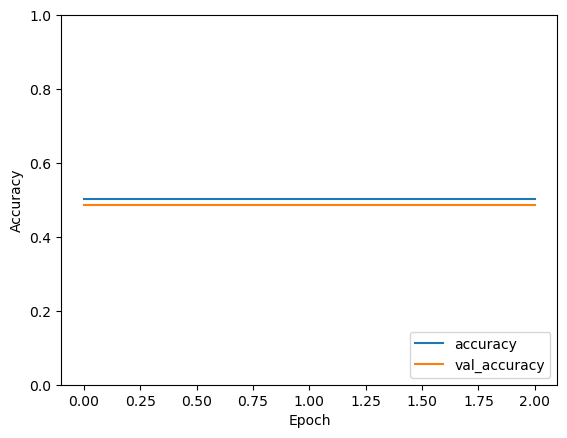

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
#print(test_acc)

# La URL del Dataset 'cats_vs_dogs' no funciona correctamente. Sin ese problema, se podría ejecutar el código que se muestra a continuación en lugar del que hemos visto previamente.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

# Es necesario tener instalado el paquete "ipywidgets"
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [ ]:


# Cargamos y partimos (datos de entrenamiento y datos de evaluación) el Dataset
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[80%]', 'train[80%:90%]', 'train[90%]'],
    with_info = True,
    as_supervised = True,
)

In [ ]:
# Creamos un objeto función que podemos utilizar para conseguir etiquetas
get_label_name = metadata.features['label'].int2str

# Mostramos dos imágenes de nuestro Dataset
for image, label in raw_train.take(2): # Número de imágenes a mostrar
    plt.figure()
    plt.imshow(image)
    plt.tittle(get_label_name(label))

**Preprocesamiento de los Datos de Entrada**

Podemos ver como el tamaño de cada imagen es distinto. Nosotros necesitamos que el tamaño sea equivalente y para ello creamos la siguiente función:

In [ ]:
IMG_SIZE = 160 ## Todas las imágenes serán de 160x160

def format_example (image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label